# Вторая практическая работа

Импорт бибилотек

In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, scale

## Загрузка данных

In [60]:
# 1. Sample generation
classpath = 'lab2dataset/practice_dataframe.xlsx'

## Вариант 11. Признаки для анализа:
'cat16_city'
'cat7_motivesForEmployeesToWorkBetter'
'num1_12'
'num2_12'
'num3_12'

In [61]:
usecols = [
    'cat16_city'
    ,'cat7_motivesForEmployeesToWorkBetter'
    , 'num1_12'
    , 'num2_12'
    , 'num3_12']

data = pd.read_excel(classpath, usecols = usecols)

In [62]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  981 non-null    object 
 1   cat16_city                            980 non-null    object 
 2   num1_12                               1000 non-null   float64
 3   num2_12                               952 non-null    float64
 4   num3_12                               973 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


,cat7_motivesForEmployeesToWorkBetter,cat16_city,num1_12,num2_12,num3_12
0,Peer motivation,moscow,-837.687526,844.805675,380.964354
1,Professional growth opportunities,St. Petersburg,1336.388455,215.923522,
2,peer motivation,St. Petersburg,869.103465,706.463138,239.490844
3,Recognition,Moscow,65.909935,444.392061,265.519349
4,Recognition,Chelyabinsk,1632.011092,1208.682281,279.955993


In [63]:
data.cat7_motivesForEmployeesToWorkBetter.unique()

array(['Peer motivation', 'Professional growth opportunities',
       'peer motivation', 'Recognition', 'Friendly work culture',
       'recognition', ' ', '-', nan], dtype=object)

In [64]:
data.cat16_city.unique()

array(['moscow', 'St. Petersburg', 'Moscow', 'Chelyabinsk', 'novosibirsk',
       nan, '-', 'Novosibirsk', ' '], dtype=object)

In [65]:
data['cat7_motivesForEmployeesToWorkBetter'] = data['cat7_motivesForEmployeesToWorkBetter']\
    .replace(
    {'peer motivation': 'Peer motivation',
     'recognition': 'Recognition',
     '-': None,
     ' ': None,
     np.nan: None}
)
data.cat7_motivesForEmployeesToWorkBetter.unique()

array(['Peer motivation', 'Professional growth opportunities',
       'Recognition', 'Friendly work culture', None], dtype=object)

In [66]:
data['cat16_city'] = data['cat16_city']\
    .replace(
    {'moscow': 'Moscow',
     'novosibirsk': 'Novosibirsk',
     '-': None,
     ' ': None,
     np.nan: None}
)
data.cat16_city.unique()

array(['Moscow', 'St. Petersburg', 'Chelyabinsk', 'Novosibirsk', None],
      dtype=object)

In [67]:
data['num3_12'] = data['num3_12'].replace(
    {'-': np.nan,
     ' ': np.nan}
)

In [68]:
data

,cat7_motivesForEmployeesToWorkBetter,cat16_city,num1_12,num2_12,num3_12
0,Peer motivation,Moscow,-837.687526,844.805675,380.964354
1,Professional growth opportunities,St. Petersburg,1336.388455,215.923522,NaN
2,Peer motivation,St. Petersburg,869.103465,706.463138,239.490844
3,Recognition,Moscow,65.909935,444.392061,265.519349
4,Recognition,Chelyabinsk,1632.011092,1208.682281,279.955993
...,...,...,...,...,...
995,Peer motivation,Moscow,200.579400,500.486928,381.730768
996,Peer motivation,Novosibirsk,1089.812971,620.717385,369.892088
997,Friendly work culture,Novosibirsk,-917.827798,441.356635,327.034143
998,Recognition,Novosibirsk,-515.523984,1045.942245,391.061667


## Визуальный анализ данных

Для качественных данных строятся столбчатая и круговая диаграммы.
Для количественных данных строятся гистограмма, оценка плотности распределения и диаграмма "ящик с усами".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  941 non-null    object 
 1   cat16_city                            942 non-null    object 
 2   num1_12                               1000 non-null   float64
 3   num2_12                               952 non-null    float64
 4   num3_12                               913 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


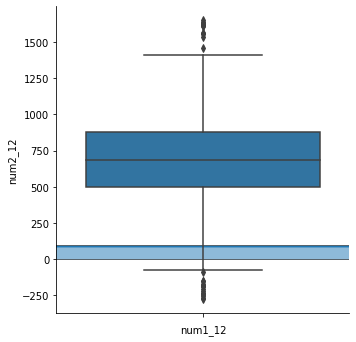

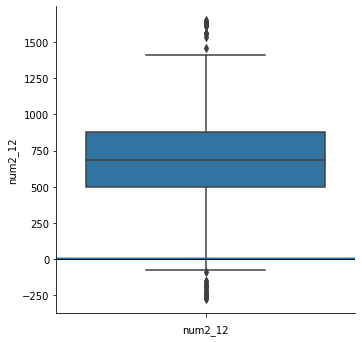

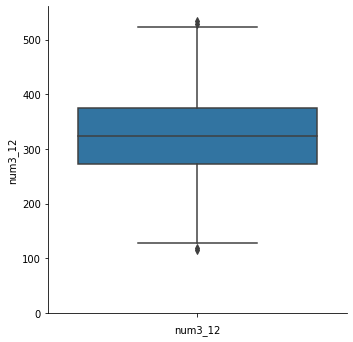

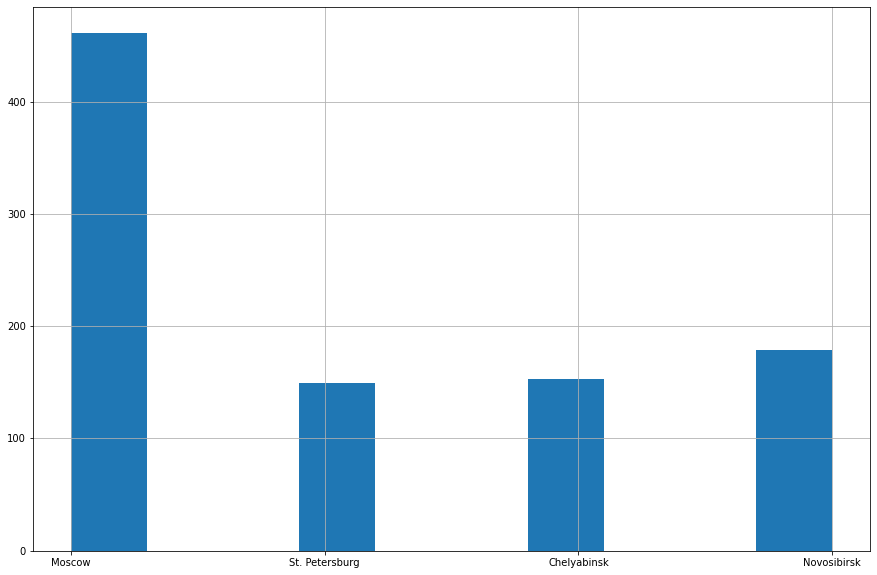

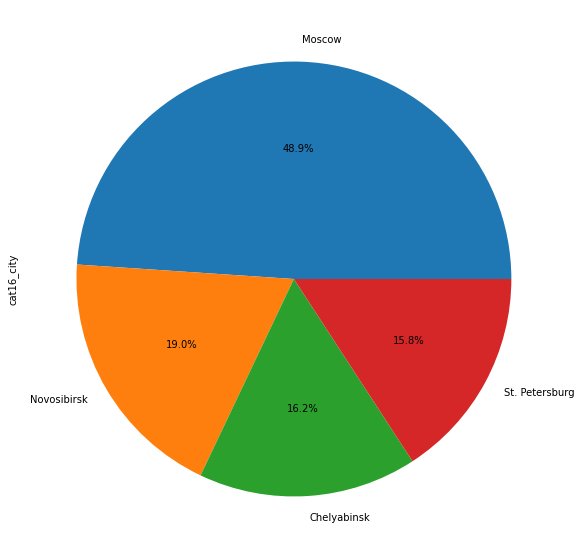

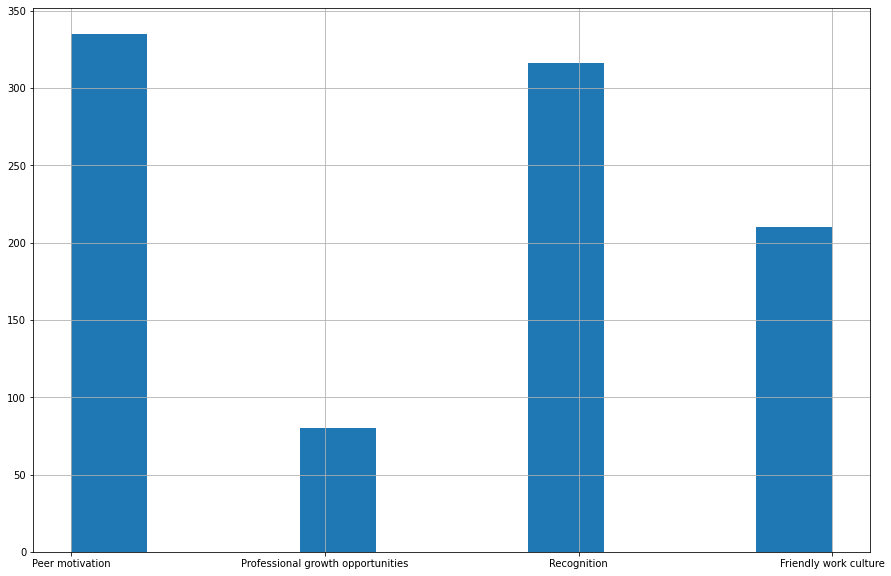

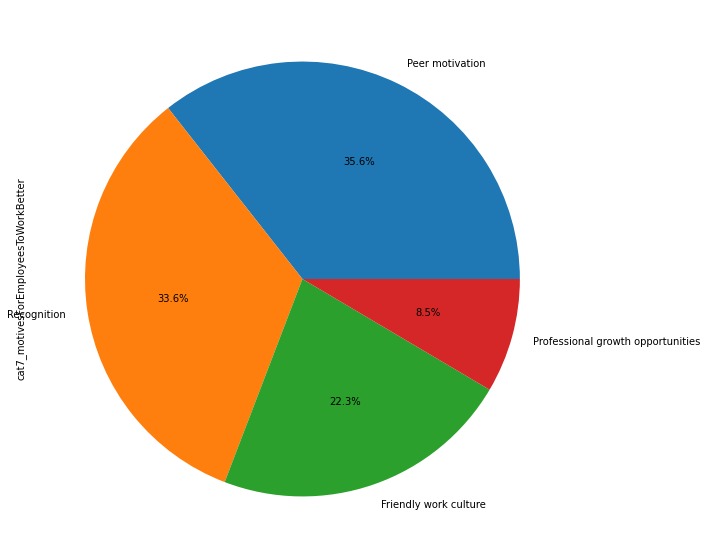

In [69]:
# cat16_city visualisation(Qualitative variable)
qualitative_features = 'cat16_city', 'cat7_motivesForEmployeesToWorkBetter'
quantitative_features = 'num1_12', 'num2_12', 'num3_12'

# Вывод и нормализация quantitative_features
sns.displot(data=data['num1_12'], kde=True)
sns.boxplot(y=data['num2_12'])

sns.displot(data=data['num2_12'], kde=True)
sns.boxplot(y=data['num2_12'])

sns.displot(data=data['num3_12'], kde=True)
sns.boxplot(y=data['num3_12'])
# Вывод и нормализация qualitative_features

for some in qualitative_features:
    plt.figure(figsize=(15,10))
    data[some].hist()
    plt.figure(figsize=(15, 10))
    data[some].value_counts().plot.pie(autopct='%1.1f%%')
data.info()

## Поиск аномальных значений

c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:3291: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\4702306\appdata\local\programs\pytho

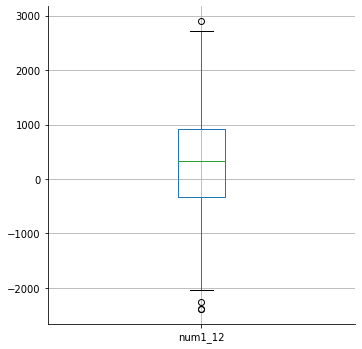

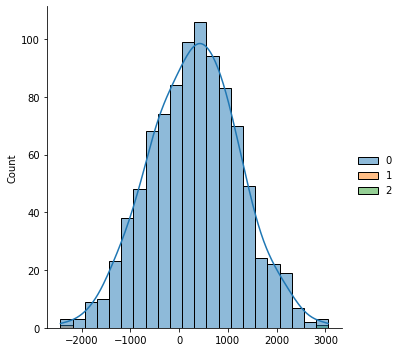

In [70]:
# Задание 3

from scipy.stats import sigmaclip

c1, low, upp = sigmaclip(data['num2_12'], 3.0, 3.0)
sns.displot(data=c1, kde=True)

Q1 = np.nanquantile(data[usecols[2]], 0.25)
Q3 = np.nanquantile(data[usecols[2]], 0.75)
IQR = Q3 - Q1
data["num1_12"] = data.query("@Q1 - 1.5*@IQR < num1_12 < @Q3 + 1.5*@IQR")\
    .boxplot(column=usecols[2])
c = sigmaclip(data['num1_12'], 3.0, 3.0)
sns.displot(data=c, kde=True)

## Преобразование данных

In [71]:
quantitative_columns = [*data.columns[(data.dtypes.values == np.dtype('float64'))]]
categorical_columns = [*data.columns[(data.dtypes.values != np.dtype('float64'))]]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[quantitative_columns])
data[[column + "_scaled" for column in quantitative_columns]] = scaled_values

scale(data.num1_12)

array([-2.72389704e-01,  6.31663094e-01,  4.37350519e-01,  1.03356048e-01,
        7.54592777e-01,  2.38249896e-01, -1.35586944e-01, -2.64238164e-01,
        4.07310528e-01,  2.12533506e-01,  5.59837784e-01,  6.55280595e-01,
       -3.44114547e-01, -4.08196685e+00,  6.56899870e-01, -1.47643752e-01,
        7.57689890e-01,  1.87265610e-01, -4.08196685e+00,  6.78876825e-01,
        1.37566484e-01,  3.84277329e-01,  2.91768114e-01, -1.26850001e-01,
        3.51574955e-01,  6.19023691e-01, -3.66596964e-02, -4.08196685e+00,
        5.94829767e-01,  8.59527580e-01, -3.28002488e-01,  2.36338301e-01,
       -6.38134296e-01, -4.08196685e+00,  1.31918187e-01,  5.47514230e-01,
        7.53197696e-01,  2.33430851e-01, -3.50980886e-01, -4.08196685e+00,
        6.82907313e-01,  6.03388981e-01, -4.08196685e+00,  3.67484866e-01,
        6.23257105e-01,  1.35772760e-01, -3.14896106e-01, -5.04134869e-01,
        4.59977712e-01,  7.15648265e-01, -4.00097375e-01,  2.47076599e-01,
        2.65086631e-01, -

## Заполнение пропусков

### Метод k ближайших соседей

In [118]:
# Onehot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
data['cat7_motivesForEmployeesToWorkBetter'] = data['cat7_motivesForEmployeesToWorkBetter'].replace(np.nan, ' ')
onehot_encoder.fit(data[['cat7_motivesForEmployeesToWorkBetter']])
enc_df = pd.DataFrame(onehot_encoder.transform(data[['cat7_motivesForEmployeesToWorkBetter']]).toarray())
# def quartile_method(dataset: pd.DataFrame):
#     for i in dataset.shape[1]

enc_df[1] = np.where(enc_df[0] == 1, np.nan, enc_df[1])
enc_df[2] = np.where(enc_df[0] == 1, np.nan, enc_df[2])
enc_df[3] = np.where(enc_df[0] == 1, np.nan, enc_df[3])
enc_df[4] = np.where(enc_df[0] == 1, np.nan, enc_df[4])
enc_df[5] = data.num1_12_scaled
enc_df = enc_df.drop(columns=[0])

knn_imputer = KNNImputer()
enc_df = pd.DataFrame(knn_imputer.fit_transform(enc_df))

enc_df[4] = np.zeros(len(enc_df.index))
enc_df[3] = np.where((enc_df[3] >= enc_df[0]) & (enc_df[3] > enc_df[1]) & (enc_df[3] > enc_df[2]), 1, 0)
enc_df[2] = np.where((enc_df[2] > enc_df[0]) & (enc_df[2] >= enc_df[1]) & (enc_df[2] >= enc_df[3]), 1, 0)
enc_df[1] = np.where((enc_df[1] > enc_df[2]) & (enc_df[1] >= enc_df[0]) & (enc_df[1] >= enc_df[3]), 1, 0)
enc_df[0] = np.where((enc_df[0] > enc_df[1]) & (enc_df[0] >= enc_df[2]) & (enc_df[0] >= enc_df[3]), 1, 0)

enc_df= enc_df[[4, 0, 1, 2, 3]]

data['cat7_motivesForEmployeesToWorkBetter'] = onehot_encoder.inverse_transform(enc_df.iloc[:, :5])

KeyError: 4

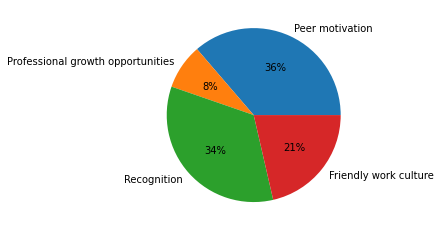

In [119]:
# Изначальное соотношение почти не поменялось
counts = Counter(data['cat7_motivesForEmployeesToWorkBetter'].dropna())
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.0f%%')
plt.show()

In [120]:
enc_df = knn_imputer.fit_transform(data[['num1_12_scaled', 'num3_12_scaled']])
data['num3_12_scaled'] = enc_df[:, 1]

### Замена самым популярным значением

In [122]:
city_mode = data.cat16_city.mode()
data.cat16_city = data.cat16_city.fillna(city_mode[0])

### Замена средним значением

In [ ]:
data['num1_12_scaled'].fillna(np.mean(data['num1_12_scaled'].dropna()), inplace=True)

### Замена медианой

In [ ]:
data['num2_12_scaled'].fillna(np.median(data['num2_12_scaled'].dropna()), inplace=True)

In [ ]:
data.info()

In [116]:
# Label encoding
label_encoder = LabelEncoder()
data['cat16_city_label'] = label_encoder.fit_transform(data['cat16_city'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  1000 non-null   object 
 1   cat16_city                            1000 non-null   object 
 2   num1_12                               1000 non-null   float64
 3   num2_12                               952 non-null    float64
 4   num3_12                               913 non-null    float64
 5   num1_12_scaled                        1000 non-null   float64
 6   num2_12_scaled                        952 non-null    float64
 7   num3_12_scaled                        1000 non-null   float64
 8   cat16_city_label                      1000 non-null   int32  
dtypes: float64(6), int32(1), object(2)
memory usage: 66.5+ KB
